In [22]:
import scipy.io as spio
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [14]:
matTrainX = spio.loadmat("../extracting_input_and_output/out/trainX.mat")
matTrainY = spio.loadmat("../extracting_input_and_output/out/trainY.mat")
matTestX = spio.loadmat("../extracting_input_and_output/out/testX.mat")
matTestY = spio.loadmat("../extracting_input_and_output/out/testY.mat")
trainX = matTrainX['X']
trainY = matTrainY['Y']
testX = matTestX['X']
testY = matTestY['Y']
trainX, trainY = shuffle(trainX, trainY, random_state=42)

In [15]:
min_max_scaler = MinMaxScaler()
trainX = min_max_scaler.fit_transform(trainX)
testX = min_max_scaler.transform(testX)

In [16]:
logisticRegressionScore = 0
logisticRegressionC = 2 ** -10

for i in np.arange(-10, 10.5, 0.5):
    c = 2 ** i;
    model = LogisticRegression(C=c, class_weight='balanced')
    model.fit(trainX, trainY.ravel())
    pred = model.predict(testX)
    score = accuracy_score(testY, pred)
    if (score > logisticRegressionScore):
        logisticRegressionScore = score
        logisticRegressionC = c
    msg = "%s: %f (%f)" % ("Logistic Regression", c, score)
    print(msg)

Logistic Regression: 0.000977 (0.483688)
Logistic Regression: 0.001381 (0.482624)
Logistic Regression: 0.001953 (0.484752)
Logistic Regression: 0.002762 (0.490071)
Logistic Regression: 0.003906 (0.490426)
Logistic Regression: 0.005524 (0.492199)
Logistic Regression: 0.007812 (0.490780)
Logistic Regression: 0.011049 (0.490071)
Logistic Regression: 0.015625 (0.488298)
Logistic Regression: 0.022097 (0.486525)
Logistic Regression: 0.031250 (0.486170)
Logistic Regression: 0.044194 (0.480496)
Logistic Regression: 0.062500 (0.481206)
Logistic Regression: 0.088388 (0.477305)
Logistic Regression: 0.125000 (0.474113)
Logistic Regression: 0.176777 (0.467730)
Logistic Regression: 0.250000 (0.463121)
Logistic Regression: 0.353553 (0.452837)
Logistic Regression: 0.500000 (0.452482)
Logistic Regression: 0.707107 (0.455674)
Logistic Regression: 1.000000 (0.455319)
Logistic Regression: 1.414214 (0.459929)
Logistic Regression: 2.000000 (0.468085)
Logistic Regression: 2.828427 (0.475887)
Logistic Regress

In [19]:
SVMScore = 0
SVMC = 2 ** -10
SVMGamma = 2 ** -10

for i in np.arange(-10, 10.5, 0.5):
    for j in np.arange(-10, 10.5, 0.5):
        c = 2 ** i;
        g = 2 ** j;
        model = SVC(C=c, gamma=g, class_weight='balanced')
        model.fit(trainX, trainY.ravel())
        pred = model.predict(testX)
        score = accuracy_score(testY, pred)
        if (score > SVMScore):
            SVMScore = score
            SVMC = c
            SVMGamma = g
        msg = "%s: %f %f (%f)" % ("SVM", c, g, score)
        print(msg)

SVM: 0.000977 0.000977 (0.468085)
SVM: 0.000977 0.001381 (0.468085)
SVM: 0.000977 0.001953 (0.468085)
SVM: 0.000977 0.002762 (0.468085)
SVM: 0.000977 0.003906 (0.468085)
SVM: 0.000977 0.005524 (0.468085)
SVM: 0.000977 0.007812 (0.468085)
SVM: 0.000977 0.011049 (0.468085)
SVM: 0.000977 0.015625 (0.468085)
SVM: 0.000977 0.022097 (0.468085)
SVM: 0.000977 0.031250 (0.468085)
SVM: 0.000977 0.044194 (0.468085)
SVM: 0.000977 0.062500 (0.468085)
SVM: 0.000977 0.088388 (0.468085)
SVM: 0.000977 0.125000 (0.468085)
SVM: 0.000977 0.176777 (0.468085)
SVM: 0.000977 0.250000 (0.468085)
SVM: 0.000977 0.353553 (0.468085)
SVM: 0.000977 0.500000 (0.468085)
SVM: 0.000977 0.707107 (0.468085)
SVM: 0.000977 1.000000 (0.468085)
SVM: 0.000977 1.414214 (0.468085)
SVM: 0.000977 2.000000 (0.468085)
SVM: 0.000977 2.828427 (0.468085)
SVM: 0.000977 4.000000 (0.468085)
SVM: 0.000977 5.656854 (0.468085)
SVM: 0.000977 8.000000 (0.468085)
SVM: 0.000977 11.313708 (0.468085)
SVM: 0.000977 16.000000 (0.468085)
SVM: 0.00097

SVM: 0.005524 90.509668 (0.531915)
SVM: 0.005524 128.000000 (0.531915)
SVM: 0.005524 181.019336 (0.531915)
SVM: 0.005524 256.000000 (0.531915)
SVM: 0.005524 362.038672 (0.531915)
SVM: 0.005524 512.000000 (0.531915)
SVM: 0.005524 724.077344 (0.531915)
SVM: 0.005524 1024.000000 (0.531915)
SVM: 0.007812 0.000977 (0.468085)
SVM: 0.007812 0.001381 (0.468085)
SVM: 0.007812 0.001953 (0.468085)
SVM: 0.007812 0.002762 (0.468085)
SVM: 0.007812 0.003906 (0.468085)
SVM: 0.007812 0.005524 (0.468085)
SVM: 0.007812 0.007812 (0.468085)
SVM: 0.007812 0.011049 (0.468085)
SVM: 0.007812 0.015625 (0.468085)
SVM: 0.007812 0.022097 (0.468085)
SVM: 0.007812 0.031250 (0.468085)
SVM: 0.007812 0.044194 (0.468085)
SVM: 0.007812 0.062500 (0.444326)
SVM: 0.007812 0.088388 (0.474113)
SVM: 0.007812 0.125000 (0.482270)
SVM: 0.007812 0.176777 (0.500709)
SVM: 0.007812 0.250000 (0.511348)
SVM: 0.007812 0.353553 (0.507092)
SVM: 0.007812 0.500000 (0.506383)
SVM: 0.007812 0.707107 (0.509220)
SVM: 0.007812 1.000000 (0.518440

SVM: 0.044194 5.656854 (0.531915)
SVM: 0.044194 8.000000 (0.531915)
SVM: 0.044194 11.313708 (0.531915)
SVM: 0.044194 16.000000 (0.531915)
SVM: 0.044194 22.627417 (0.454965)
SVM: 0.044194 32.000000 (0.468085)
SVM: 0.044194 45.254834 (0.531915)
SVM: 0.044194 64.000000 (0.531915)
SVM: 0.044194 90.509668 (0.531915)
SVM: 0.044194 128.000000 (0.531915)
SVM: 0.044194 181.019336 (0.531915)
SVM: 0.044194 256.000000 (0.531915)
SVM: 0.044194 362.038672 (0.531915)
SVM: 0.044194 512.000000 (0.531915)
SVM: 0.044194 724.077344 (0.531915)
SVM: 0.044194 1024.000000 (0.531915)
SVM: 0.062500 0.000977 (0.468085)
SVM: 0.062500 0.001381 (0.468085)
SVM: 0.062500 0.001953 (0.468085)
SVM: 0.062500 0.002762 (0.468085)
SVM: 0.062500 0.003906 (0.468085)
SVM: 0.062500 0.005524 (0.468085)
SVM: 0.062500 0.007812 (0.471631)
SVM: 0.062500 0.011049 (0.483688)
SVM: 0.062500 0.015625 (0.484043)
SVM: 0.062500 0.022097 (0.485106)
SVM: 0.062500 0.031250 (0.479433)
SVM: 0.062500 0.044194 (0.485461)
SVM: 0.062500 0.062500 (0.

SVM: 0.353553 0.353553 (0.480851)
SVM: 0.353553 0.500000 (0.490426)
SVM: 0.353553 0.707107 (0.495745)
SVM: 0.353553 1.000000 (0.498582)
SVM: 0.353553 1.414214 (0.515248)
SVM: 0.353553 2.000000 (0.528014)
SVM: 0.353553 2.828427 (0.531915)
SVM: 0.353553 4.000000 (0.531915)
SVM: 0.353553 5.656854 (0.531915)
SVM: 0.353553 8.000000 (0.531915)
SVM: 0.353553 11.313708 (0.531915)
SVM: 0.353553 16.000000 (0.531915)
SVM: 0.353553 22.627417 (0.531915)
SVM: 0.353553 32.000000 (0.531915)
SVM: 0.353553 45.254834 (0.531915)
SVM: 0.353553 64.000000 (0.531915)
SVM: 0.353553 90.509668 (0.531915)
SVM: 0.353553 128.000000 (0.531915)
SVM: 0.353553 181.019336 (0.531915)
SVM: 0.353553 256.000000 (0.531915)
SVM: 0.353553 362.038672 (0.531915)
SVM: 0.353553 512.000000 (0.531915)
SVM: 0.353553 724.077344 (0.531915)
SVM: 0.353553 1024.000000 (0.531915)
SVM: 0.500000 0.000977 (0.478369)
SVM: 0.500000 0.001381 (0.482979)
SVM: 0.500000 0.001953 (0.485106)
SVM: 0.500000 0.002762 (0.487589)
SVM: 0.500000 0.003906 (0.

SVM: 2.828427 0.022097 (0.471986)
SVM: 2.828427 0.031250 (0.464184)
SVM: 2.828427 0.044194 (0.451418)
SVM: 2.828427 0.062500 (0.456383)
SVM: 2.828427 0.088388 (0.480142)
SVM: 2.828427 0.125000 (0.489362)
SVM: 2.828427 0.176777 (0.502837)
SVM: 2.828427 0.250000 (0.508865)
SVM: 2.828427 0.353553 (0.508156)
SVM: 2.828427 0.500000 (0.511702)
SVM: 2.828427 0.707107 (0.515603)
SVM: 2.828427 1.000000 (0.523759)
SVM: 2.828427 1.414214 (0.530142)
SVM: 2.828427 2.000000 (0.531560)
SVM: 2.828427 2.828427 (0.531915)
SVM: 2.828427 4.000000 (0.531915)
SVM: 2.828427 5.656854 (0.540426)
SVM: 2.828427 8.000000 (0.531915)
SVM: 2.828427 11.313708 (0.531915)
SVM: 2.828427 16.000000 (0.531915)
SVM: 2.828427 22.627417 (0.531915)
SVM: 2.828427 32.000000 (0.531915)
SVM: 2.828427 45.254834 (0.531915)
SVM: 2.828427 64.000000 (0.531915)
SVM: 2.828427 90.509668 (0.531915)
SVM: 2.828427 128.000000 (0.531915)
SVM: 2.828427 181.019336 (0.531915)
SVM: 2.828427 256.000000 (0.531915)
SVM: 2.828427 362.038672 (0.531915)

SVM: 16.000000 724.077344 (0.531915)
SVM: 16.000000 1024.000000 (0.531915)
SVM: 22.627417 0.000977 (0.484043)
SVM: 22.627417 0.001381 (0.478014)
SVM: 22.627417 0.001953 (0.464539)
SVM: 22.627417 0.002762 (0.460993)
SVM: 22.627417 0.003906 (0.460993)
SVM: 22.627417 0.005524 (0.455319)
SVM: 22.627417 0.007812 (0.452482)
SVM: 22.627417 0.011049 (0.459929)
SVM: 22.627417 0.015625 (0.477660)
SVM: 22.627417 0.022097 (0.492199)
SVM: 22.627417 0.031250 (0.502482)
SVM: 22.627417 0.044194 (0.512766)
SVM: 22.627417 0.062500 (0.522695)
SVM: 22.627417 0.088388 (0.524468)
SVM: 22.627417 0.125000 (0.523050)
SVM: 22.627417 0.176777 (0.519149)
SVM: 22.627417 0.250000 (0.520567)
SVM: 22.627417 0.353553 (0.523759)
SVM: 22.627417 0.500000 (0.530496)
SVM: 22.627417 0.707107 (0.530851)
SVM: 22.627417 1.000000 (0.531560)
SVM: 22.627417 1.414214 (0.531560)
SVM: 22.627417 2.000000 (0.533333)
SVM: 22.627417 2.828427 (0.533688)
SVM: 22.627417 4.000000 (0.536525)
SVM: 22.627417 5.656854 (0.548227)
SVM: 22.627417 

SVM: 128.000000 4.000000 (0.558156)
SVM: 128.000000 5.656854 (0.561702)
SVM: 128.000000 8.000000 (0.541489)
SVM: 128.000000 11.313708 (0.531915)
SVM: 128.000000 16.000000 (0.531915)
SVM: 128.000000 22.627417 (0.531915)
SVM: 128.000000 32.000000 (0.531915)
SVM: 128.000000 45.254834 (0.531915)
SVM: 128.000000 64.000000 (0.531915)
SVM: 128.000000 90.509668 (0.531915)
SVM: 128.000000 128.000000 (0.531915)
SVM: 128.000000 181.019336 (0.531915)
SVM: 128.000000 256.000000 (0.531915)
SVM: 128.000000 362.038672 (0.531915)
SVM: 128.000000 512.000000 (0.531915)
SVM: 128.000000 724.077344 (0.531915)
SVM: 128.000000 1024.000000 (0.531915)
SVM: 181.019336 0.000977 (0.453546)
SVM: 181.019336 0.001381 (0.456738)
SVM: 181.019336 0.001953 (0.469858)
SVM: 181.019336 0.002762 (0.476596)
SVM: 181.019336 0.003906 (0.492199)
SVM: 181.019336 0.005524 (0.503546)
SVM: 181.019336 0.007812 (0.512057)
SVM: 181.019336 0.011049 (0.524113)
SVM: 181.019336 0.015625 (0.524468)
SVM: 181.019336 0.022097 (0.525532)
SVM: 1

SVM: 1024.000000 0.001953 (0.515603)
SVM: 1024.000000 0.002762 (0.521986)
SVM: 1024.000000 0.003906 (0.523404)
SVM: 1024.000000 0.005524 (0.526241)
SVM: 1024.000000 0.007812 (0.529078)
SVM: 1024.000000 0.011049 (0.529787)
SVM: 1024.000000 0.015625 (0.528723)
SVM: 1024.000000 0.022097 (0.529078)
SVM: 1024.000000 0.031250 (0.528723)
SVM: 1024.000000 0.044194 (0.526596)
SVM: 1024.000000 0.062500 (0.526950)
SVM: 1024.000000 0.088388 (0.531560)
SVM: 1024.000000 0.125000 (0.531560)
SVM: 1024.000000 0.176777 (0.531915)
SVM: 1024.000000 0.250000 (0.531560)
SVM: 1024.000000 0.353553 (0.531915)
SVM: 1024.000000 0.500000 (0.533333)
SVM: 1024.000000 0.707107 (0.531206)
SVM: 1024.000000 1.000000 (0.531915)
SVM: 1024.000000 1.414214 (0.535816)
SVM: 1024.000000 2.000000 (0.543972)
SVM: 1024.000000 2.828427 (0.547163)
SVM: 1024.000000 4.000000 (0.559220)
SVM: 1024.000000 5.656854 (0.553546)
SVM: 1024.000000 8.000000 (0.539007)
SVM: 1024.000000 11.313708 (0.531915)
SVM: 1024.000000 16.000000 (0.531915)

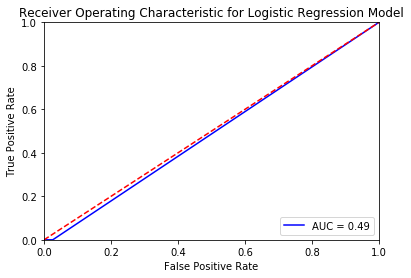

In [30]:
model = LogisticRegression(C=logisticRegressionC, class_weight='balanced')
model.fit(trainX, trainY.ravel())
pred = model.predict(testX)
score = accuracy_score(testY, pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Logistic Regression Model')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0,1.0])
plt.ylim([-0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.5673758865248227


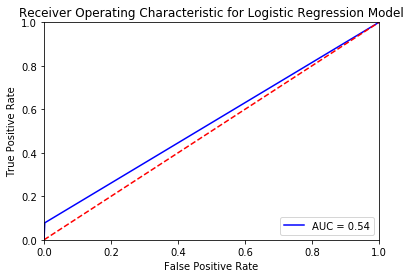

In [32]:
model = SVC(C=SVMC, gamma=SVMGamma, class_weight='balanced')
model.fit(trainX, trainY.ravel())
pred = model.predict(testX)
score = accuracy_score(testY, pred)
print(score)

false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Logistic Regression Model')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0,1.0])
plt.ylim([-0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()